In [13]:
import pandas as pd
import glob as glob
import seaborn as sns
%pylab inline

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


/home/SERILOCAL/i.leontiadis/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


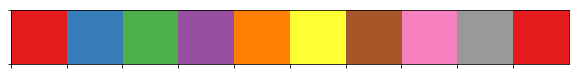

In [14]:
colors =  sns.color_palette("Set1", 10)
sns.set_palette(colors)
sns.palplot(colors)

In [15]:
import pickle
file = open("./emdl_mobile_runs_detailed_nnpack.pkl",'rb')
mobile_data = pickle.load(file)
mobile_data.head()
mobile_data= mobile_data[mobile_data.batch_size == 1]


mobile_data.loc[mobile_data.platform == '845030700039', 'platform']= 'SDM845-CPU (nnpack)'
mobile_data.loc[mobile_data.platform == '2313cfd41e037ece', 'platform']= 'Note 9-CPU (nnpack)'

mobile_data = mobile_data[mobile_data['batch_size'] == 1]
time_per_layer_mobile_nnpack = mobile_data.groupby(['platform','network', 'operation'])['time'].sum().reset_index()


In [16]:
file = open("./emdl_mobile_runs_detailed.pkl",'rb')
mobile_data = pickle.load(file)
mobile_data.head()
mobile_data= mobile_data[mobile_data.batch_size == 1]


mobile_data.loc[mobile_data.platform == '845030700039', 'platform']= 'SDM845-CPU'
mobile_data.loc[mobile_data.platform == '2313cfd41e037ece', 'platform']= 'Note 9-CPU'

mobile_data = mobile_data[mobile_data['batch_size'] == 1]
time_per_layer_mobile = mobile_data.groupby(['platform','network', 'operation'])['time'].sum().reset_index()

In [17]:
all_per_operation = pd.read_csv("operations.csv")


In [18]:
all_per_operation = pd.read_csv("operations.csv")
#all_per_operation = all_per_operation[all_per_operation]
all_per_operation['operation'] = all_per_operation.operation.str.extract("^([^\(]+)")
time_per_layer_dekstop = all_per_operation.groupby(['platform','network', 'operation'])['time'].sum().reset_index()
time_per_layer_dekstop.head()

platform  network  operation      time
0  CPU-XEON-4116  alexnet     Conv2d  0.007763
1  CPU-XEON-4116  alexnet    Dropout  0.000014
2  CPU-XEON-4116  alexnet     Linear  0.003172
3  CPU-XEON-4116  alexnet  MaxPool2d  0.001416
4  CPU-XEON-4116  alexnet       ReLU  0.000050

In [19]:
totals = []
per_layer = []
for file in list(glob.glob('./macro-bench@NCS2/*.csv')):
    name = file.split('/')[-1][6:-6].replace("_relu","")
    r = pd.read_csv(file)
    r['model'] = name
    
    totals.append(r[r.name.str.contains('Average iteration runtime')])
    per_layer.append(r[~r.name.str.contains('Average iteration runtime')])
    
totals = pd.concat(totals)
per_layer = pd.concat(per_layer)

In [20]:
ncs = pd.DataFrame()
ncs['operation'] = per_layer.layer_type
ncs['network'] = per_layer['model']
ncs['time'] = per_layer['real_time (ms)']


ncs = ncs.groupby(['network', 'operation'])['time'].sum().reset_index()

ncs['platform'] = 'NCS2'
ncs.head(10)

network       operation    time platform
0      alexnet         <Extra>   0.333     NCS2
1      alexnet     Convolution   5.262     NCS2
2      alexnet  FullyConnected  12.623     NCS2
3      alexnet         Pooling   0.164     NCS2
4      alexnet  Receive-Tensor   0.000     NCS2
5  densenet121         <Extra>   0.357     NCS2
6  densenet121          Concat   0.660     NCS2
7  densenet121     Convolution  24.408     NCS2
8  densenet121  FullyConnected   0.235     NCS2
9  densenet121         Pooling   2.468     NCS2

In [21]:
time_per_layer = pd.concat([time_per_layer_dekstop, time_per_layer_mobile, ncs, time_per_layer_mobile_nnpack])

/home/SERILOCAL/i.leontiadis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [22]:
to_keep = ['alexnet', 
        'densenet201', 
        'inception_v3', 
        'nasnet_mobile', 
        'resnet152', 
        'shufflenet_v2_05', 
        'vgg16', 
        'xception', 
        'mnasnet', 
        'mobilenet_v2'
          ]

time_per_layer = time_per_layer[time_per_layer.network.isin(to_keep)]

In [23]:
time_per_layer.loc[time_per_layer.platform == 'SDM845-for-arm64-9-28', 'platform']= 'SDM845-CPU'
time_per_layer.loc[time_per_layer.platform == 'SM-N960F-8.1.0-27', 'platform']= 'Note 9-CPU'

#SDM845-for-arm64-9-28
#SM-N960F-8.1.0-27

/home/SERILOCAL/i.leontiadis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


CPU-XEON-4116


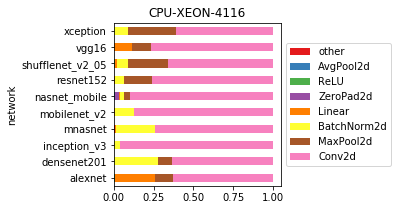

operation
other          0.001409
AvgPool2d      0.001138
ReLU           0.001295
ZeroPad2d      0.002662
Linear         0.040838
BatchNorm2d    0.090653
MaxPool2d      0.109082
Conv2d         0.752923
dtype: float64


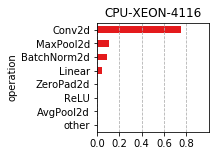

GPU-NVIDIA-2080Ti


/home/SERILOCAL/i.leontiadis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


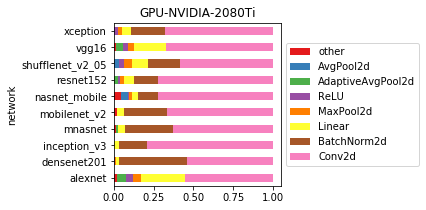

operation
other                0.011477
AvgPool2d            0.007826
AdaptiveAvgPool2d    0.014009
ReLU                 0.016471
MaxPool2d            0.021273
Linear               0.086814
BatchNorm2d          0.186351
Conv2d               0.655779
dtype: float64


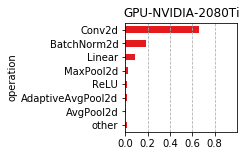

GPU-NVIDIA-Xavier


/home/SERILOCAL/i.leontiadis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


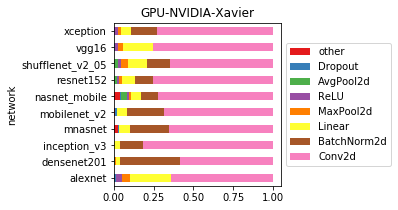

operation
other          0.007417
Dropout        0.005091
AvgPool2d      0.009417
ReLU           0.012740
MaxPool2d      0.018247
Linear         0.096279
BatchNorm2d    0.152229
Conv2d         0.698581
dtype: float64


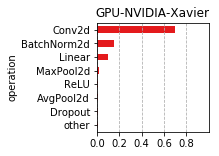

NCS2


/home/SERILOCAL/i.leontiadis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


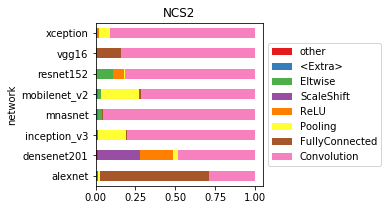

operation
other             0.002603
<Extra>           0.007622
Eltwise           0.020071
ScaleShift        0.032556
ReLU              0.035541
Pooling           0.066953
FullyConnected    0.109399
Convolution       0.725254
dtype: float64


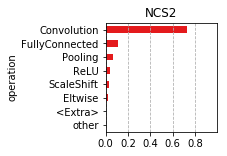

Note 9-CPU


/home/SERILOCAL/i.leontiadis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


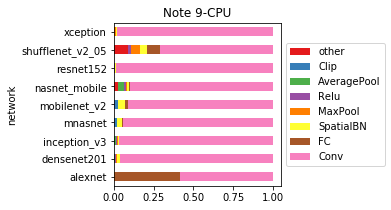

operation
other          0.014282
Clip           0.004754
AveragePool    0.005846
Relu           0.006211
MaxPool        0.009362
SpatialBN      0.020110
FC             0.058446
Conv           0.880988
dtype: float64


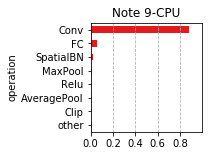

Note 9-CPU (nnpack)


/home/SERILOCAL/i.leontiadis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


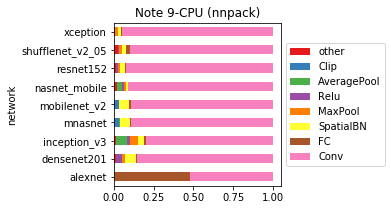

operation
other          0.010828
Clip           0.007570
AveragePool    0.011199
Relu           0.011593
MaxPool        0.014851
SpatialBN      0.035763
FC             0.060248
Conv           0.847948
dtype: float64


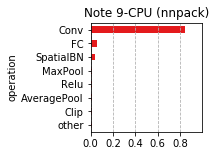

SDM845-CPU


/home/SERILOCAL/i.leontiadis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


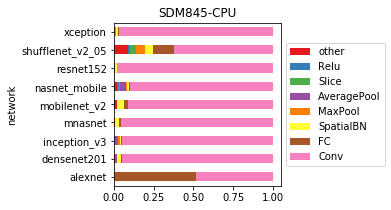

operation
other          0.017882
Relu           0.004475
Slice          0.004570
AveragePool    0.006918
MaxPool        0.010711
SpatialBN      0.021449
FC             0.076169
Conv           0.857826
dtype: float64


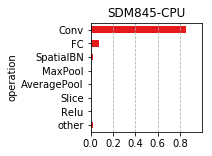

SDM845-CPU (nnpack)


/home/SERILOCAL/i.leontiadis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


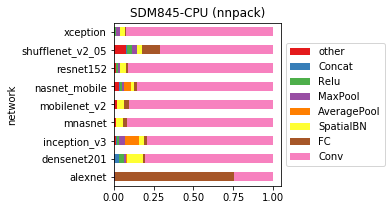

operation
other          0.020827
Concat         0.004904
Relu           0.012344
MaxPool        0.015471
AveragePool    0.015846
SpatialBN      0.036922
FC             0.110154
Conv           0.783531
dtype: float64


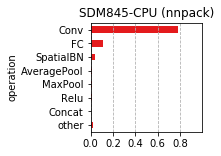

In [24]:

for group, data in time_per_layer.groupby(['platform']):
    print (group)
    data['percentage'] = data.groupby(['network'])['time'].transform(lambda x: x/x.sum())
    
    # pivot (for stacked plotting)
    perv2 =  data.pivot(columns='operation', index='network', values='percentage')

    # sort axis based on average/sum column/row
    perv2 = perv2.reindex(perv2.sum().sort_values(ascending=True).index, axis=1) # sort columns by average time 
    perv2 = perv2.sort_index()
    sum_layers = perv2.iloc[:,  : -7].sum(axis=1)
    
    perv2 = perv2.iloc[:, -7:]
    perv2.insert(0, 'other', sum_layers)

    f = plt.figure()
    perv2.plot(kind='barh', stacked=True, figsize=(3,3),  ax=f.gca())
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title(group)
    plt.savefig(group.replace(".", "_")  + "_per_layer.pdf", bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    
    
    f = plt.figure(figsize=(2,2))
    ax = f.gca()
    perv2.fillna(0).mean().plot(kind='barh')
    print (perv2.fillna(0).mean())
    ax.set_xticks(numpy.arange(0, 1, 0.2))
    ax.xaxis.grid(linestyle='--')
    plt.title(group)
    plt.xlim(0,1)
    #plt.xscale('log')
    plt.savefig(group.replace(" ", "") + "_total_layer.pdf", bbox_inches = 'tight', pad_inches = 0)
    
    plt.show()

(0, 1)

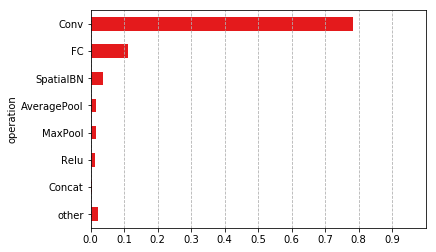

In [25]:
f = plt.figure()
ax = f.gca()
perv2.fillna(0).mean().plot(kind='barh')
ax.set_xticks(numpy.arange(0, 1, 0.1))
ax.xaxis.grid(linestyle='--')
plt.xlim(0,1)

In [27]:
"total_time.head(5)

SyntaxError: EOL while scanning string literal (<ipython-input-27-88ac8fcb3117>, line 1)

In [28]:

total_time = time_per_layer.groupby(['network', 'platform'])['time'].sum().reset_index()
infs= pd.read_csv("inferences.csv")
infs=infs[infs.batch_size==1]
infs['time'] = 1000/ infs['inferences/s'] 
infs = infs[['network','target','time']]
infs.columns = ['network','platform','time']
infs.head()
total_time = total_time[~total_time.platform.isin(infs.platform)]
total_time = pd.concat([total_time, infs])


In [29]:
#total_time = time_per_layer.groupby(['network', 'platform'])['time'].sum().reset_index()
to_keep = ['alexnet', 
        'densenet201', 
        'inception_v3', 
        'nasnet_mobile', 
        'resnet152', 
        'shufflenet_v2_05', 
        'vgg16', 
        'xception', 
        'mnasnet', 
        'mobilenet_v2'
          ]

total_time = total_time[total_time.network.isin(to_keep)]




meta_data = pd.read_csv("./MSDNet Equivalent Baselines - Sheet1.csv")
meta_data = meta_data.dropna(subset=["Flops"])
meta_data.head()    
total_time = pd.merge(total_time, meta_data, left_on='network', right_on='Model')
 
total_time

network             platform         time             Model  \
0            alexnet                 NCS2    18.382000           alexnet   
1            alexnet           Note 9-CPU   478.580298           alexnet   
2            alexnet  Note 9-CPU (nnpack)   507.557015           alexnet   
3            alexnet           SDM845-CPU   294.200678           alexnet   
4            alexnet  SDM845-CPU (nnpack)   209.961343           alexnet   
5            alexnet    GPU-NVIDIA-2080Ti     1.469692           alexnet   
6            alexnet    GPU-NVIDIA-Xavier     5.594881           alexnet   
7            alexnet        CPU-XEON-4116    16.112812           alexnet   
8        densenet201                 NCS2    82.554000       densenet201   
9        densenet201           Note 9-CPU  2040.008089       densenet201   
10       densenet201  Note 9-CPU (nnpack)   973.001285       densenet201   
11       densenet201           SDM845-CPU  1187.702630       densenet201   
12       densenet201  SDM845-CPU (nnpack)   327.868544       densenet201   
13       densenet201    GPU-NVIDIA-2080Ti    29.080513       densenet201   
14       densenet201    GPU-NVIDIA-Xavier    77.527816       densenet201   
15       densenet201        CPU-XEON-4116   316.444040       densenet201   
16           mnasnet                 NCS2    40.287000           mnasnet   
17           mnasnet           Note 9-CPU   475.060175           mnasnet   
18           mnasnet  Note 9-CPU (nnpack)   563.021372           mnasnet   
19           mnasnet           SDM845-CPU   391.142245           mnasnet   
20           mnasnet  SDM845-CPU (nnpack)   311.995699           mnasnet   
21           mnasnet    GPU-NVIDIA-2080Ti     7.079716           mnasnet   
22           mnasnet    GPU-NVIDIA-Xavier    20.426978           mnasnet   
23           mnasnet        CPU-XEON-4116    80.349507           mnasnet   
24      mobilenet_v2                 NCS2    28.545000      mobilenet_v2   
25      mobilenet_v2           Note 9-CPU   226.496841      mobilenet_v2   
26      mobilenet_v2  Note 9-CPU (nnpack)   427.773092      mobilenet_v2   
27      mobilenet_v2           SDM845-CPU   156.547649      mobilenet_v2   
28      mobilenet_v2  SDM845-CPU (nnpack)   202.593200      mobilenet_v2   
29      mobilenet_v2    GPU-NVIDIA-2080Ti     7.025008      mobilenet_v2   
30      mobilenet_v2    GPU-NVIDIA-Xavier    20.141590      mobilenet_v2   
31      mobilenet_v2        CPU-XEON-4116    71.788414      mobilenet_v2   
32     nasnet_mobile           Note 9-CPU   563.251622     nasnet_mobile   
33     nasnet_mobile  Note 9-CPU (nnpack)   983.335608     nasnet_mobile   
34     nasnet_mobile           SDM845-CPU   485.623717     nasnet_mobile   
35     nasnet_mobile  SDM845-CPU (nnpack)   388.970791     nasnet_mobile   
36     nasnet_mobile    GPU-NVIDIA-2080Ti    36.932406     nasnet_mobile   
37     nasnet_mobile    GPU-NVIDIA-Xavier    99.204798     nasnet_mobile   
38     nasnet_mobile        CPU-XEON-4116   344.617190     nasnet_mobile   
39         resnet152                 NCS2   155.556000         resnet152   
40         resnet152           Note 9-CPU  5385.452498         resnet152   
41         resnet152  Note 9-CPU (nnpack)  1887.555979         resnet152   
42         resnet152           SDM845-CPU  2378.129579         resnet152   
43         resnet152  SDM845-CPU (nnpack)   666.888231         resnet152   
44         resnet152    GPU-NVIDIA-2080Ti    20.798427         resnet152   
45         resnet152    GPU-NVIDIA-Xavier    55.196104         resnet152   
46         resnet152        CPU-XEON-4116   289.993407         resnet152   
47  shufflenet_v2_05           Note 9-CPU    37.111672  shufflenet_v2_05   
48  shufflenet_v2_05  Note 9-CPU (nnpack)   240.395520  shufflenet_v2_05   
49  shufflenet_v2_05           SDM845-CPU    27.058506  shufflenet_v2_05   
50  shufflenet_v2_05  SDM845-CPU (nnpack)    58.321571  shufflenet_v2_05   
51  shufflenet_v2_05    GPU-NVIDIA-2080Ti     8.753218  shuff

CPU-XEON-4116
161.13566664915894
alexnet 16.11281242530855
densenet201 316.44403989325997
mnasnet 80.3495069150091
mobilenet_v2 71.78841392668181
nasnet_mobile 344.6171904688097
resnet152 289.9934070352126
shufflenet_v2_05 61.28624177594309
vgg16 108.4937207530465


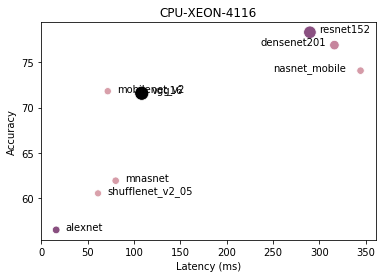

GPU-NVIDIA-2080Ti
14.158199245732526
alexnet 1.469691618285974
densenet201 29.080512941163807
mnasnet 7.079715668672275
mobilenet_v2 7.025007582125705
nasnet_mobile 36.932405894703244
resnet152 20.798427055496994
shufflenet_v2_05 8.753218189670223
vgg16 2.1266150157419914


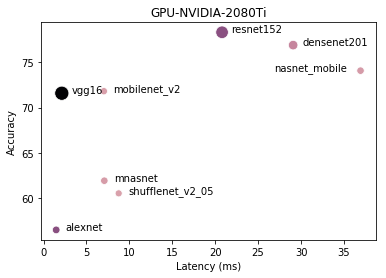

GPU-NVIDIA-Xavier
38.75863157431825
alexnet 5.594881374040922
densenet201 77.52781554350115
mnasnet 20.426978109168587
mobilenet_v2 20.14159025919869
nasnet_mobile 99.20479751010018
resnet152 55.196104299595255
shufflenet_v2_05 24.778438868773513
vgg16 7.198446630167711


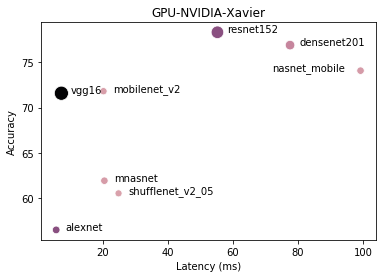

NCS2
82.94833333333338
alexnet 18.382000000000005
densenet201 82.55399999999996
mnasnet 40.28700000000036
mobilenet_v2 28.544999999999895
resnet152 155.55600000000004
vgg16 172.36599999999999


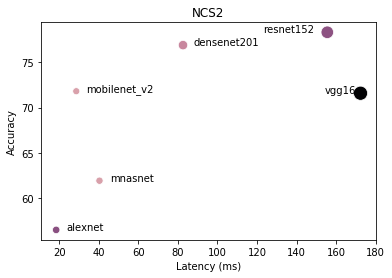

Note 9-CPU
1315.1373135314284
alexnet 478.58029836000003
densenet201 2040.0080889100002
mnasnet 475.06017531
mobilenet_v2 226.49684055
nasnet_mobile 563.2516215600001
resnet152 5385.45249809
shufflenet_v2_05 37.11167193999999


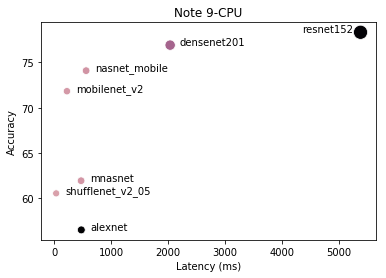

Note 9-CPU (nnpack)
797.5199815078573
alexnet 507.55701546999995
densenet201 973.0012845199999
mnasnet 563.0213724000001
mobilenet_v2 427.77309218
nasnet_mobile 983.3356077800006
resnet152 1887.5559786100005
shufflenet_v2_05 240.3955195950001


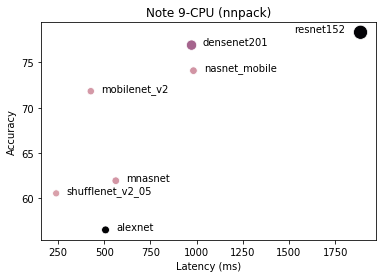

SDM845-CPU
702.9150005142856
alexnet 294.20067771
densenet201 1187.7026296599997
mnasnet 391.14224536
mobilenet_v2 156.54764862999997
nasnet_mobile 485.6237169300002
resnet152 2378.12957892
shufflenet_v2_05 27.05850639


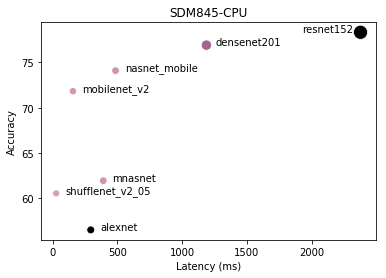

SDM845-CPU (nnpack)
309.5141971042857
alexnet 209.961342845
densenet201 327.8685439800001
mnasnet 311.9956990899999
mobilenet_v2 202.59320041
nasnet_mobile 388.97079132599976
resnet152 666.8882309600001
shufflenet_v2_05 58.321571119


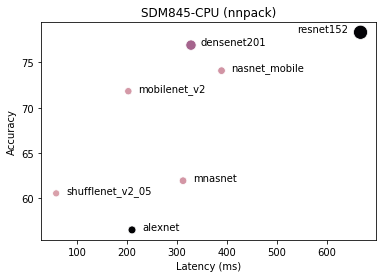

In [30]:
cmap = sns.cubehelix_palette(dark=.01, light=.7, as_cmap=True)

for group, data in total_time.groupby(['platform']):
    print (group)
    data = data.reset_index()
    data['Images/Sec'] = data['time']
    p1=sns.scatterplot(data=data, y="Acc (top-1)", x="Images/Sec", size='Flops', color="skyblue", hue='Params', palette=cmap ,sizes=(50, 200), legend=False)
    p1.set_xlabel("Latency (ms)")
    p1.set_ylabel("Accuracy")
    
    print (data['Images/Sec'].mean())
    # ANNOTATE
    for line in range(0,data.shape[0]):
        y = data.loc[line, 'Acc (top-1)']
        x = data.loc[line, "Images/Sec"]
        label = data.loc[line, "network"]
        m = data["Images/Sec"].max()
        print (label, x)
        if x > m*0.9 :
            offset = -0.21*m*len(label)/10
        else: 
            offset = 0.03*m
       
        p1.text(x + offset, y  , label, horizontalalignment='left', size='medium', color='black')
    #plt.xscale('log')
    plt.title(group)
    plt.savefig(group.replace(" ", "") + "_acc_vs_time.pdf", bbox_inches = 'tight', pad_inches = 0)
    plt.show()   
        

CPU-XEON-4116


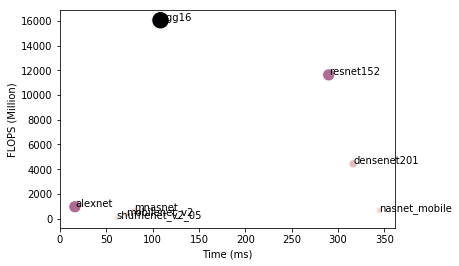

GPU-NVIDIA-2080Ti


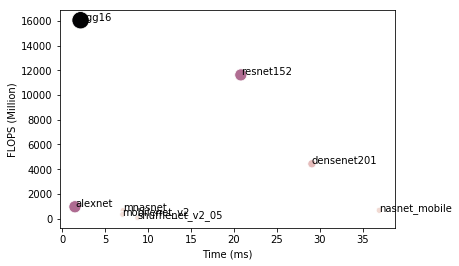

GPU-NVIDIA-Xavier


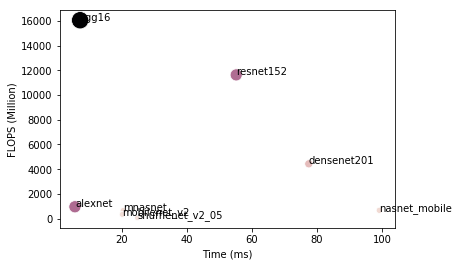

NCS2


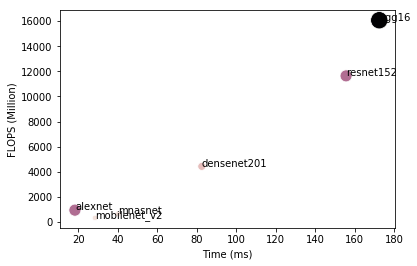

Note 9-CPU


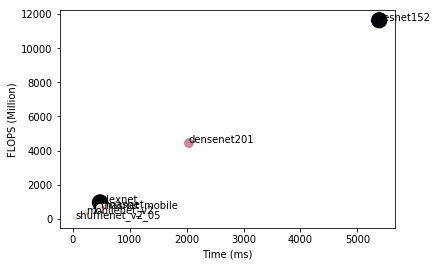

Note 9-CPU (nnpack)


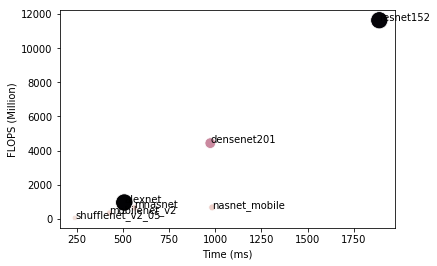

SDM845-CPU


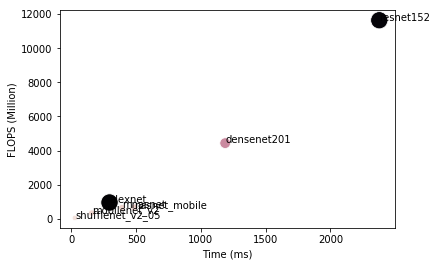

SDM845-CPU (nnpack)


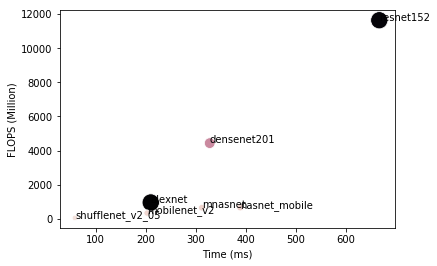

In [31]:
cmap = sns.cubehelix_palette(dark=.01, light=.9, as_cmap=True)

for group, data in total_time.groupby(['platform']):
    print (group)
    data = data.reset_index()
    p1=sns.scatterplot(data=data, y="Flops", x="time", size='Params', color="skyblue", hue='Params', palette=cmap ,sizes=(30, 300), legend=False)
    p1.set_xlabel("Time (ms)")
    p1.set_ylabel("FLOPS (Million)")

    # ANNOTATE
    for line in range(0,data.shape[0]):
        y = data.loc[line, 'Flops']
        x = data.loc[line, "time"]
        label = data.loc[line, "network"]
       
        p1.text(x , y , label, horizontalalignment='left', size='medium', color='black')
    plt.show()
        
        

In [32]:
total_time[]

SyntaxError: invalid syntax (<ipython-input-32-181da128a2fc>, line 1)

In [33]:
infs= pd.read_csv("inferences.csv")
infs=infs[infs.batch_size == 1]
infs.head(20)

target  batch_size           network  inferences/s
1    GPU-NVIDIA-2080Ti           1       densenet169     40.413690
11   GPU-NVIDIA-2080Ti           1          resnet34    158.451105
21   GPU-NVIDIA-2080Ti           1  shufflenet_v2_05    114.243696
31   GPU-NVIDIA-2080Ti           1            nasnet     20.967996
38   GPU-NVIDIA-2080Ti           1       densenet161     42.288432
48   GPU-NVIDIA-2080Ti           1          resnet18    247.666897
58   GPU-NVIDIA-2080Ti           1           alexnet    680.414849
68   GPU-NVIDIA-2080Ti           1       densenet121     54.218624
78   GPU-NVIDIA-2080Ti           1           pnasnet     26.206065
85   GPU-NVIDIA-2080Ti           1   squeezenet_v1_1    295.823320
95   GPU-NVIDIA-2080Ti           1          xception    112.639903
105  GPU-NVIDIA-2080Ti           1       densenet201     34.387289
115  GPU-NVIDIA-2080Ti           1   shufflenet_v2_1    116.321114
125  GPU-NVIDIA-2080Ti           1         resnet101     68.436419
135  GPU-NVIDIA-2080Ti           1          resnet50    121.677308
145  GPU-NVIDIA-2080Ti           1      inception_v3     71.410001
154  GPU-NVIDIA-2080Ti           1     nasnet_mobile     27.076492
164  GPU-NVIDIA-2080Ti           1             vgg16    470.230856
173  GPU-NVIDIA-2080Ti           1      inception_v4     45.059704
182  GPU-NVIDIA-2080Ti           1         resnet152     48.080559

In [ ]:
oper= pd.read_csv("operations.csv")
10/oper.groupby(['network'])['time'].sum()


In [ ]:
""